In [ ]:
# Этап 1. Генерация данных
# Для генераии данных возможно выбрать поднабор изображений в количестве 10-50 шт, "нарезку" патчей выполнить по ним.
# Изучите набор данных, располагающийся в архиве blood_cells.
# Выполните "нарезку" изображений. Сохраните в отдельные папки изображения фона и изображения клеток.
# Реализуйте генератор данных снимков клеток крови. На выходе генератор предосталвяет два изображения: сгенерированное без шума, сгенерированное с шумом.
# Патчи для формирования фона:
# 1) патчи, вырезанные из исходного набора данных
# 2) искусственно сформированные патчи (равномерная заливка фона из диапазона допустимых значений)
# Фон изображения формируется из набора патчей.
# Патчи для клеток крови:
# 1) патчи, вырезанные из исходного набора данных
# 2) искусствено сгенерированные окружности с заливкой из допустимого набора данных
# для blending-задачи применять: https://learnopencv.com/seamless-cloning-using-opencv-python-cpp/
# Примеры генераторов и загрузчиков данных найдете в исходной папке.
##########
# Основные этапы генерации:
# 1. Выбор, формирование патчей, их препроцессинг. Формирование(комбинирование) фона из набора патчей. Постпроцессинг результирующего фона.
# 2. Выбор метоположения клекток, выбор/формирование клеток, совмещение клеток на фоновом изображении
# 3. Выбор типа шума. Зашумление изображения.
#
# Генератор возвращает два изображения: зашумленное (этап 3) и исходное (этап 2) изображения.

# Этап 2. Исследование качества работы алгоритмов шумоподавления на сформированном датасете.
# Виды шумов:
# 1) Шум Гаусса
# 2) постоянный шум
# Виды фильтров:
# 1) Медианный фильтр
# 2) фильтр гаусса
# 3) билатериальный фильтр
# 4) фильтр нелокальных средних с различными параметрами.
# 5.1) самостоятелная реализация алгоритма шумоподавления (CPU)
# 5.2) самостоятелная реализация алгоритма шумоподавления (GPU)
# Метрики:
# 1) MSE
# 2) SSIM
# 3) время работы
#

In [1]:
!unzip /content/blood_cells_dataset.zip -d /content/blood_cells_dataset


Archive:  /content/blood_cells_dataset.zip
   creating: /content/blood_cells_dataset/blood_cells_dataset/
   creating: /content/blood_cells_dataset/blood_cells_dataset/mask/
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/00a02700-2ea2-4590-9e15-ffc9160fd3de.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/00c8364b-8c85-4502-bcfe-64736fe76815.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/00d04a90-80e5-4bce-9511-1b64eabb7a47.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/01b38a56-13eb-447b-89ee-fc21cb40dcc1.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/01b99da8-b66b-464b-a7ee-1cadab8db18b.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/0a3b53c7-e7ab-4135-80aa-fd2079d727d6.png  
  inflating: /content/blood_cells_dataset/blood_cells_dataset/mask/0a747cb3-c720-4572-a661-ab5670a5c42e.png  
 extracting: /content/blood_cells_dataset/blood_cells_da

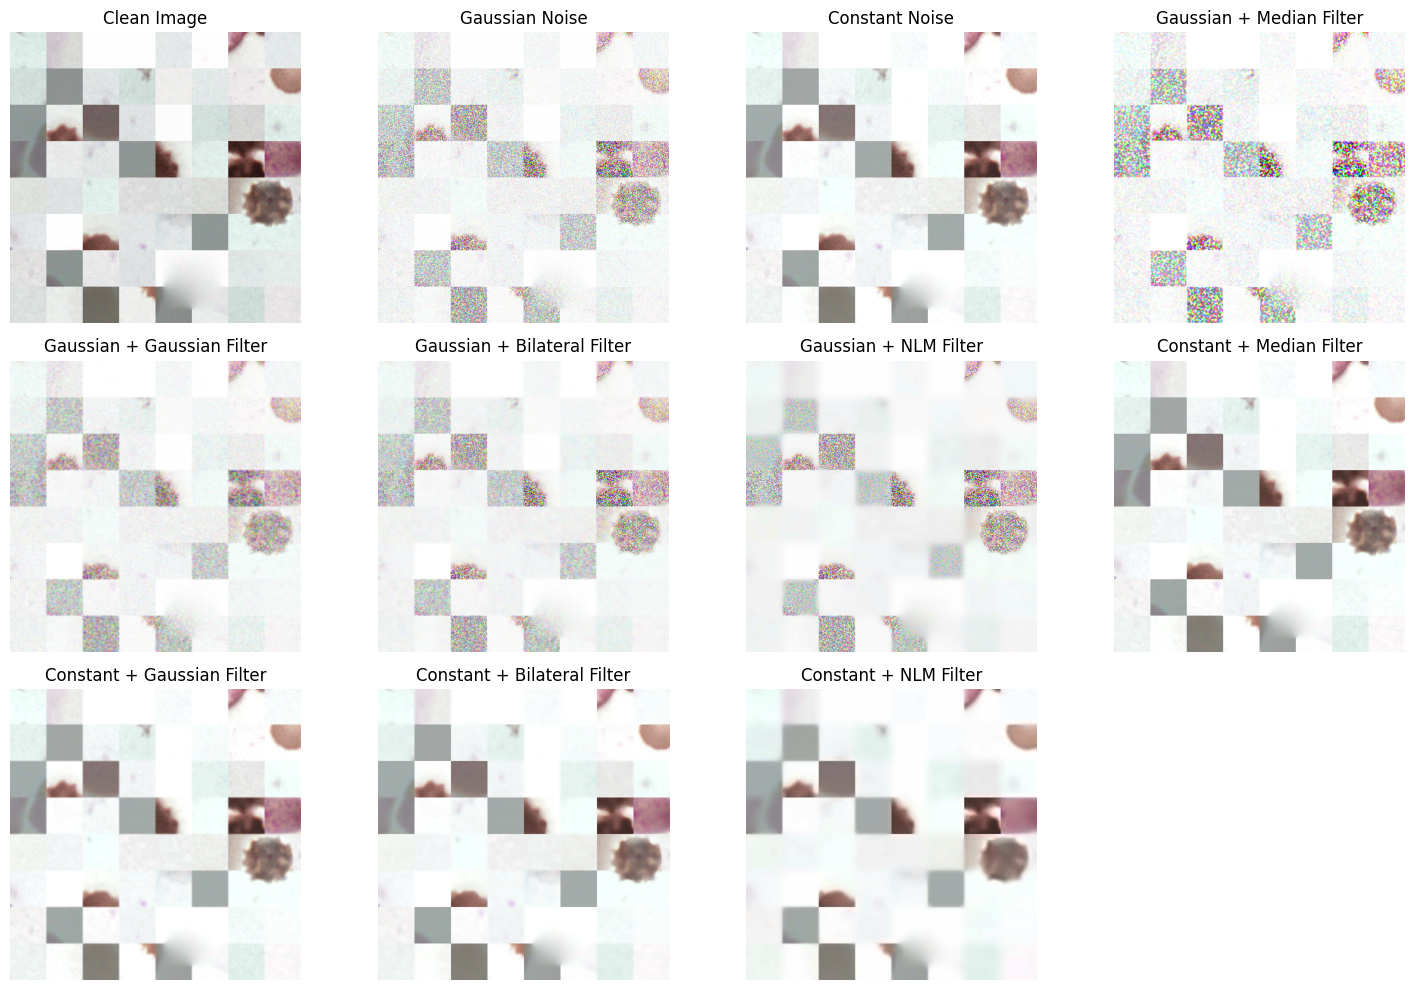


--- Итоги работы ---
Время работы: 6.6879 секунд

МЕТРИКИ для изображения с гауссовым шумом:
MSE: 219.5157, SSIM: 0.3600
После медианного фильтра: MSE: 282.5688, SSIM: 0.4369
После гауссова фильтра: MSE: 319.3486, SSIM: 0.7089
После билатерального фильтра: MSE: 318.9894, SSIM: 0.6867
После фильтра НЛМ: MSE: 295.7235, SSIM: 0.6835

МЕТРИКИ для изображения с постоянным шумом:
MSE: 376.2659, SSIM: 0.9815
После медианного фильтра: MSE: 354.6087, SSIM: 0.9594
После гауссова фильтра: MSE: 353.0994, SSIM: 0.9413
После билатерального фильтра: MSE: 336.7953, SSIM: 0.9407
После фильтра НЛМ: MSE: 314.2560, SSIM: 0.8881


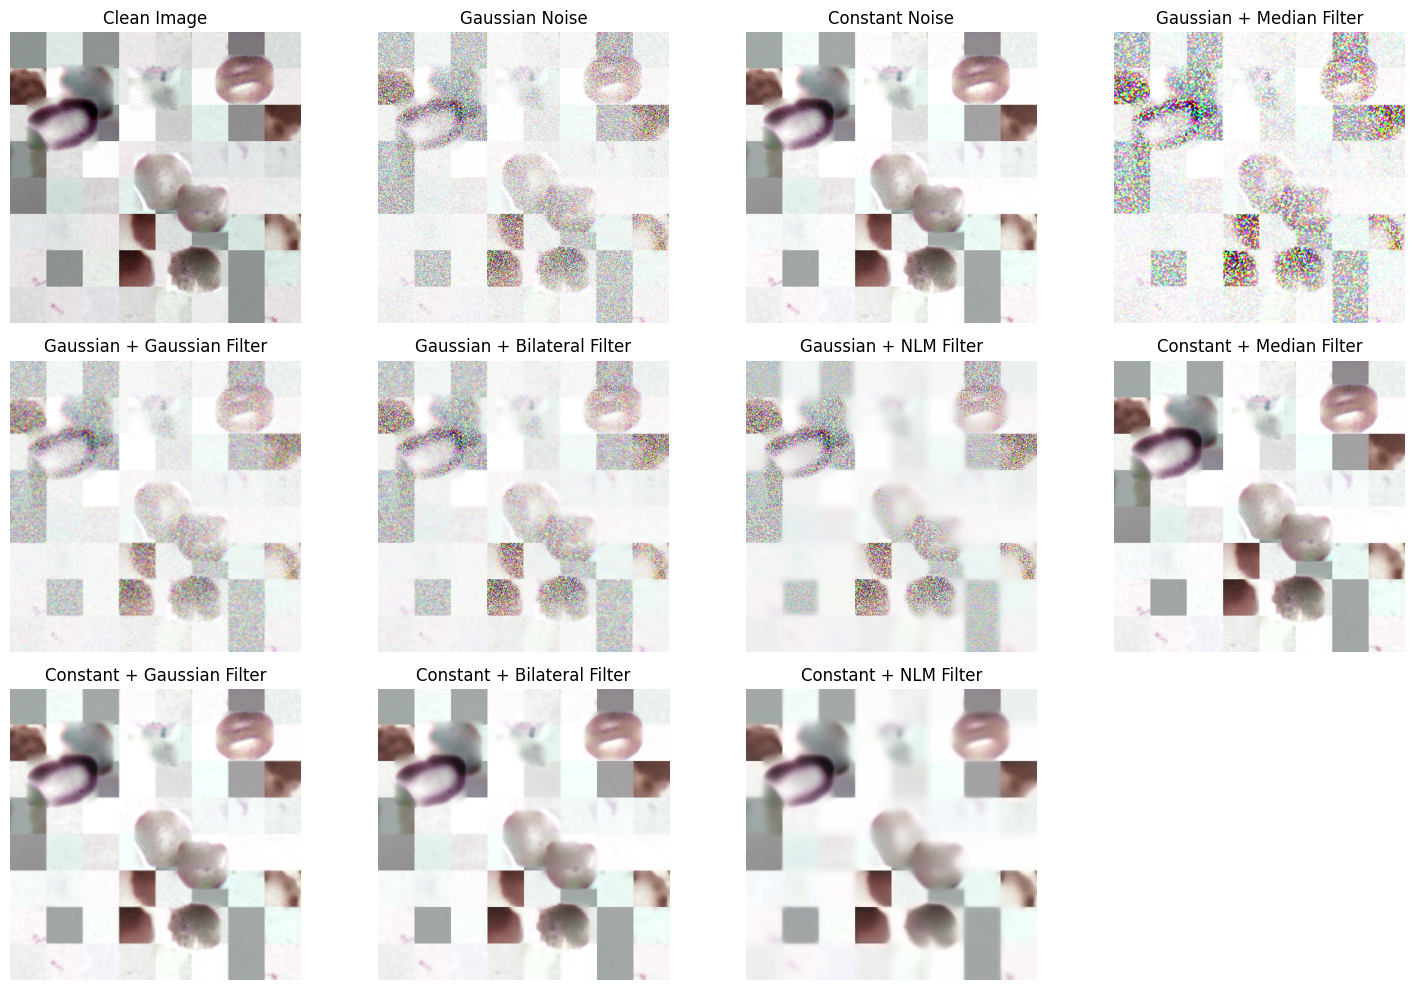


--- Итоги работы ---
Время работы: 13.1435 секунд

МЕТРИКИ для изображения с гауссовым шумом:
MSE: 228.5878, SSIM: 0.2778
После медианного фильтра: MSE: 296.5335, SSIM: 0.3461
После гауссова фильтра: MSE: 333.8475, SSIM: 0.6286
После билатерального фильтра: MSE: 333.4723, SSIM: 0.5657
После фильтра НЛМ: MSE: 300.8697, SSIM: 0.5648

МЕТРИКИ для изображения с постоянным шумом:
MSE: 398.3127, SSIM: 0.9804
После медианного фильтра: MSE: 374.6234, SSIM: 0.9575
После гауссова фильтра: MSE: 368.4468, SSIM: 0.9403
После билатерального фильтра: MSE: 350.2095, SSIM: 0.9336
После фильтра НЛМ: MSE: 329.2341, SSIM: 0.8729


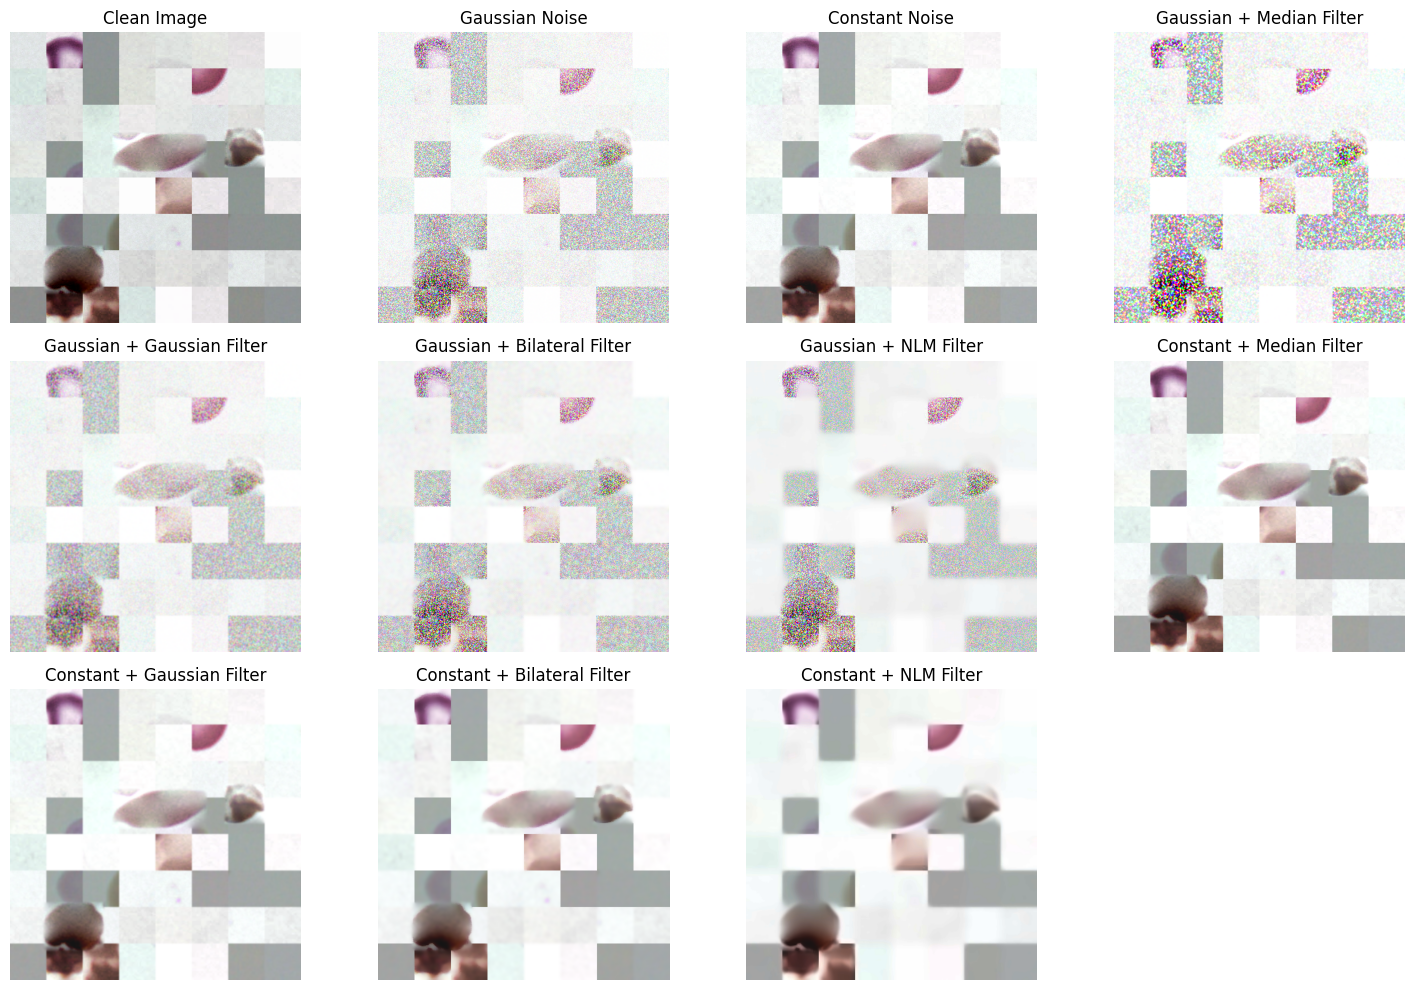


--- Итоги работы ---
Время работы: 19.1831 секунд

МЕТРИКИ для изображения с гауссовым шумом:
MSE: 227.7480, SSIM: 0.3039
После медианного фильтра: MSE: 291.9309, SSIM: 0.3744
После гауссова фильтра: MSE: 323.3778, SSIM: 0.6561
После билатерального фильтра: MSE: 323.7808, SSIM: 0.6113
После фильтра НЛМ: MSE: 303.4013, SSIM: 0.6093

МЕТРИКИ для изображения с постоянным шумом:
MSE: 391.9036, SSIM: 0.9837
После медианного фильтра: MSE: 370.3947, SSIM: 0.9632
После гауссова фильтра: MSE: 367.9968, SSIM: 0.9465
После билатерального фильтра: MSE: 351.3188, SSIM: 0.9431
После фильтра НЛМ: MSE: 322.9477, SSIM: 0.8881


In [33]:
import cv2
import numpy as np
import random
import os
from glob import glob
import time
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Пути
image_dir = "/content/blood_cells_dataset/blood_cells_dataset/original"
mask_dir = "/content/blood_cells_dataset/blood_cells_dataset/mask"
output_cells_dir = "data/cells"
output_background_dir = "data/background"
generated_data_dir = "generated_data"  # Папка для сохранения сгенерированных изображений

PATCH_SIZE = (64, 64)
MIN_CELL_SIZE = 30
IMAGE_SIZE = (512, 512)
NUM_CELLS_RANGE = (2, 10)

# Функция для нарезки фона (без клеток)
def crop_background_patches(image_paths, mask_paths, output_dir, patch_size=PATCH_SIZE):
    os.makedirs(output_dir, exist_ok=True)
    count = 0
    for image_path, mask_path in zip(image_paths, mask_paths):
        print(f"Обрабатываем: {image_path}, {mask_path}")
        img = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None or mask is None:
            print(f"Не удалось загрузить изображения: {image_path}, {mask_path}")
            continue
        h, w = img.shape[:2]
        for i in range(0, h - patch_size[1] + 1, patch_size[1] // 2):
            for j in range(0, w - patch_size[0] + 1, patch_size[0] // 2):
                patch = img[i:i + patch_size[1], j:j + patch_size[0]]
                mask_patch = mask[i:i + patch_size[1], j:j + patch_size[0]]
                if np.any(mask_patch > 0):
                    continue  # Пропускаем патчи с клетками
                output_path = os.path.join(output_dir, f"background_patch_{count}.png")
                cv2.imwrite(output_path, patch)
                count += 1
    print(f"Сохранено {count} фоновых патчей")

# Функция для нарезки клеток (по маскам)
def crop_cell_patches_with_masks(image_paths, mask_paths, output_dir, patch_size=PATCH_SIZE, min_cell_size=MIN_CELL_SIZE):
    os.makedirs(output_dir, exist_ok=True)
    count = 0
    for image_path, mask_path in zip(image_paths, mask_paths):
        print(f"Обрабатываем: {image_path}, {mask_path}")
        img = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None or mask is None:
            print(f"Не удалось загрузить изображения: {image_path}, {mask_path}")
            continue
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w < min_cell_size or h < min_cell_size:
                continue  # Пропускаем слишком маленькие клетки
            patch = img[y:y + h, x:x + w]
            if patch.shape[0] == 0 or patch.shape[1] == 0:
                continue
            if patch.shape[0] < patch_size[1] or patch.shape[1] < patch_size[0]:
                patch = cv2.resize(patch, patch_size, interpolation=cv2.INTER_AREA)
            output_path = os.path.join(output_dir, f"cell_patch_{count}.png")
            cv2.imwrite(output_path, patch)
            count += 1
    print(f"Сохранено {count} патчей с клетками")

# Функция генерации фона из фоновых патчей
def create_background_from_patches(image_size=IMAGE_SIZE, patch_dir="data/background"):
    background = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)
    patch_size = (64, 64)
    patch_files = glob(os.path.join(patch_dir, "*.png"))

    if not patch_files:
        raise ValueError("Фоновые патчи не найдены!")

    num_patches_x = image_size[0] // patch_size[0]
    num_patches_y = image_size[1] // patch_size[1]

    for i in range(num_patches_y):
        for j in range(num_patches_x):
            patch = cv2.imread(random.choice(patch_files))
            if patch is None:
                continue
            background[i * patch_size[1]:(i + 1) * patch_size[1], j * patch_size[0]:(j + 1) * patch_size[0]] = patch

    return background

# Функция добавления клеток
def place_cell(background, cell):
    bg_h, bg_w, _ = background.shape
    cell_h, cell_w, _ = cell.shape
    mask = 255 * np.ones((cell_h, cell_w), dtype=np.uint8)
    x = random.randint(0, bg_w - cell_w)
    y = random.randint(0, bg_h - cell_h)
    center = (x + cell_w // 2, y + cell_h // 2)
    return cv2.seamlessClone(cell, background, mask, center, cv2.NORMAL_CLONE)

# Функции добавления шума
def add_gaussian_noise(image, mean=0, sigma=10):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def add_constant_noise(image, value=20):
    return cv2.add(image, value)

# Фильтры для шумоподавления
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def apply_nlm_filter(image, h=10, templateWindowSize=7, searchWindowSize=21):
    return cv2.fastNlMeansDenoisingColored(image, None, h, templateWindowSize, searchWindowSize)


# Метрики
def mse(imageA, imageB):
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compute_ssim(imageA, imageB):
    return ssim(imageA, imageB, multichannel=True, win_size=3)


start_time = time.time()  # Добавьте это перед началом генерации данных или фильтрации.

# Генератор данных
def data_generator(cell_patch_dir="data/cells"):
    os.makedirs(generated_data_dir, exist_ok=True)  # Создаем папку для сохранения изображений
    while True:
        background = create_background_from_patches()
        clean_image = background.copy()
        num_cells = random.randint(NUM_CELLS_RANGE[0], NUM_CELLS_RANGE[1])

        cell_files = glob(os.path.join(cell_patch_dir, "*.png"))
        if not cell_files:
            raise ValueError("Клеточные патчи не найдены!")

        for _ in range(num_cells):
            cell = cv2.imread(random.choice(cell_files))
            clean_image = place_cell(clean_image, cell)

        noisy_gaus_image = add_gaussian_noise(clean_image.copy())
        noisy_constant_image = add_constant_noise(clean_image.copy())

        # Сохраняем сгенерированные изображения
        cv2.imwrite(os.path.join(generated_data_dir, f"clean_image_{random.randint(1000, 9999)}.png"), clean_image)
        cv2.imwrite(os.path.join(generated_data_dir, f"noisy_gaus_image_{random.randint(1000, 9999)}.png"), noisy_gaus_image)
        cv2.imwrite(os.path.join(generated_data_dir, f"noisy_constant_image_{random.randint(1000, 9999)}.png"), noisy_constant_image)

        yield noisy_gaus_image, noisy_constant_image, clean_image

# Пример генерации и применения фильтров
generator = data_generator()

for i in range(3):
    noisy_gaus_image, noisy_constant_image, clean_image = next(generator)

    # Применяем фильтры для шумоподавления
    denoised_gaus_median = apply_median_filter(noisy_gaus_image)
    denoised_gaus_gaussian = apply_gaussian_filter(noisy_gaus_image)
    denoised_gaus_bilateral = apply_bilateral_filter(noisy_gaus_image)
    denoised_gaus_nlm = apply_nlm_filter(noisy_gaus_image)

    denoised_constant_median = apply_median_filter(noisy_constant_image)
    denoised_constant_gaussian = apply_gaussian_filter(noisy_constant_image)
    denoised_constant_bilateral = apply_bilateral_filter(noisy_constant_image)
    denoised_constant_nlm = apply_nlm_filter(noisy_constant_image)

    # Отображаем результаты
    plt.figure(figsize=(15, 10))

    # Генерируем графики
    plt.subplot(3, 4, 1)
    plt.imshow(clean_image)
    plt.title("Clean Image")
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.imshow(noisy_gaus_image)
    plt.title("Gaussian Noise")
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.imshow(noisy_constant_image)
    plt.title("Constant Noise")
    plt.axis('off')

    # Применяем фильтры для шума гаусса
    plt.subplot(3, 4, 4)
    plt.imshow(denoised_gaus_median)
    plt.title("Gaussian + Median Filter")
    plt.axis('off')

    plt.subplot(3, 4, 5)
    plt.imshow(denoised_gaus_gaussian)
    plt.title("Gaussian + Gaussian Filter")
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(denoised_gaus_bilateral)
    plt.title("Gaussian + Bilateral Filter")
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.imshow(denoised_gaus_nlm)
    plt.title("Gaussian + NLM Filter")
    plt.axis('off')

    # Применяем фильтры для постоянного шума
    plt.subplot(3, 4, 8)
    plt.imshow(denoised_constant_median)
    plt.title("Constant + Median Filter")
    plt.axis('off')

    plt.subplot(3, 4, 9)
    plt.imshow(denoised_constant_gaussian)
    plt.title("Constant + Gaussian Filter")
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.imshow(denoised_constant_bilateral)
    plt.title("Constant + Bilateral Filter")
    plt.axis('off')

    plt.subplot(3, 4, 11)
    plt.imshow(denoised_constant_nlm)
    plt.title("Constant + NLM Filter")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Вычисляем метрики после применения всех фильтров
    mse_gaus = mse(clean_image, noisy_gaus_image)
    ssim_gaus = compute_ssim(clean_image, noisy_gaus_image)

    mse_constant = mse(clean_image, noisy_constant_image)
    ssim_constant = compute_ssim(clean_image, noisy_constant_image)

    mse_gaus_median = mse(clean_image, denoised_gaus_median)
    ssim_gaus_median = compute_ssim(clean_image, denoised_gaus_median)

    mse_gaus_gaussian = mse(clean_image, denoised_gaus_gaussian)
    ssim_gaus_gaussian = compute_ssim(clean_image, denoised_gaus_gaussian)

    mse_gaus_bilateral = mse(clean_image, denoised_gaus_bilateral)
    ssim_gaus_bilateral = compute_ssim(clean_image, denoised_gaus_bilateral)

    mse_gaus_nlm = mse(clean_image, denoised_gaus_nlm)
    ssim_gaus_nlm = compute_ssim(clean_image, denoised_gaus_nlm)

    mse_constant_median = mse(clean_image, denoised_constant_median)
    ssim_constant_median = compute_ssim(clean_image, denoised_constant_median)

    mse_constant_gaussian = mse(clean_image, denoised_constant_gaussian)
    ssim_constant_gaussian = compute_ssim(clean_image, denoised_constant_gaussian)

    mse_constant_bilateral = mse(clean_image, denoised_constant_bilateral)
    ssim_constant_bilateral = compute_ssim(clean_image, denoised_constant_bilateral)

    mse_constant_nlm = mse(clean_image, denoised_constant_nlm)
    ssim_constant_nlm = compute_ssim(clean_image, denoised_constant_nlm)

    # Время работы
    end_time = time.time()
    execution_time = end_time - start_time

    # Выводим метрики
    print(f"\n--- Итоги работы ---")
    print(f"Время работы: {execution_time:.4f} секунд\n")

    print(f"МЕТРИКИ для изображения с гауссовым шумом:")
    print(f"MSE: {mse_gaus:.4f}, SSIM: {ssim_gaus:.4f}")
    print(f"После медианного фильтра: MSE: {mse_gaus_median:.4f}, SSIM: {ssim_gaus_median:.4f}")
    print(f"После гауссова фильтра: MSE: {mse_gaus_gaussian:.4f}, SSIM: {ssim_gaus_gaussian:.4f}")
    print(f"После билатерального фильтра: MSE: {mse_gaus_bilateral:.4f}, SSIM: {ssim_gaus_bilateral:.4f}")
    print(f"После фильтра НЛМ: MSE: {mse_gaus_nlm:.4f}, SSIM: {ssim_gaus_nlm:.4f}")

    print(f"\nМЕТРИКИ для изображения с постоянным шумом:")
    print(f"MSE: {mse_constant:.4f}, SSIM: {ssim_constant:.4f}")
    print(f"После медианного фильтра: MSE: {mse_constant_median:.4f}, SSIM: {ssim_constant_median:.4f}")
    print(f"После гауссова фильтра: MSE: {mse_constant_gaussian:.4f}, SSIM: {ssim_constant_gaussian:.4f}")
    print(f"После билатерального фильтра: MSE: {mse_constant_bilateral:.4f}, SSIM: {ssim_constant_bilateral:.4f}")
    print(f"После фильтра НЛМ: MSE: {mse_constant_nlm:.4f}, SSIM: {ssim_constant_nlm:.4f}")

